# Étude de la complémentarité Conso-Éolien-PV

Voici une question proche, qui m'a déjà interpellée, et pour laquelle je n'ai pas encore cherché de réponse : il y a une corrélation positive entre la production éolienne et la consommation elec française (toutes deux plus fortes en hiver).
Cependant, comme tu l'as remarqué, en cas d'anticyclone hivernal, on a une chute de la prod éolienne. C'est le cette semaine, mais aussi lors des vagues de grand froid. Ainsi, localement, l'éolien et la consommation seraient corrélées négativement.
On arrive alors à la question : lors de ces anticyclones, y a-t-il toujours une augmentation de la production solaire (qui compenserait la chute de l'éolien). Autrement dit, y a-t-il une corrélation négative en hiver entre éolien et solaire ?
(Il faut préciser "en hiver", car sur l'année entière, la corrélation négative est évidente)

Recherche rapide de la production de ces derniers jours, avec 3 cas de figure : ce mercredi vent - et PV +. On a aussi l'inverse (tempête et nuages). Et enfin le cas plus embêtant : peu d'éolien et solaire assez moyen. Il faudrait quantifier tout ça.

PH, 28 fév 2019

![Screenshot RTE eCO2mix](img/Screenshot_RTE_eCO2mix.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

## Read load/wind cf/solar cf data

2014 to 2018, at a 30 min timestep 

In [14]:
lws = pd.read_csv('data/load_wind_solar.csv.xz', compression='xz', index_col=0, parse_dates=True)
lws.head(3)

,load,wind_cf,solar_cf
2014-01-01 00:00:00,64660.0,0.425236,0.000000
2014-01-01 00:30:00,63494.0,0.411263,-0.000229
2014-01-01 01:00:00,61362.0,0.407951,-0.000229


In [15]:
lws.tail(3)

,load,wind_cf,solar_cf
2018-12-31 22:30:00,61009.0,0.102661,-0.000235
2018-12-31 23:00:00,64060.0,0.101469,-0.000235
2018-12-31 23:30:00,63878.0,0.101602,-0.000235


Convert load from MW to GW:

In [25]:
lws.load /= 1000

## Montly averages

In [26]:
lws1M = lws.resample('1M').mean()

There is a **strong negative correlation** (-0.79) between wind and solar CF. This implies good complementarity. 

In [149]:
lws1M.corr()

,load,wind_cf,solar_cf
load,1.000000,0.802331,-0.85462
wind_cf,0.802331,1.000000,-0.78900
solar_cf,-0.854620,-0.789000,1.00000


/home/pierre/Programmes/bin/miniconda3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


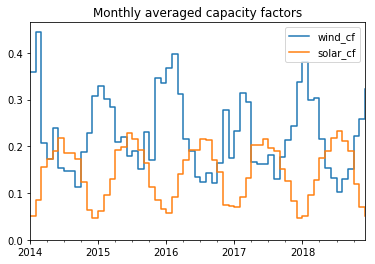

In [27]:
lws1M.wind_cf.plot(drawstyle='steps-post')
lws1M.solar_cf.plot(drawstyle='steps-post')
plt.ylim(ymin=0)
plt.legend()
plt.title('Monthly averaged capacity factors');

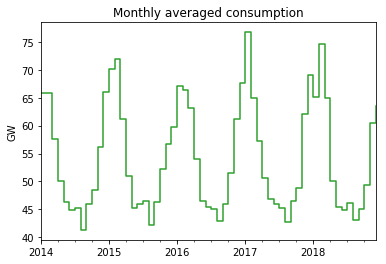

In [28]:
lws1M.load.plot(drawstyle='steps-post',color='C2')
plt.title('Monthly averaged consumption')
plt.ylabel('GW');

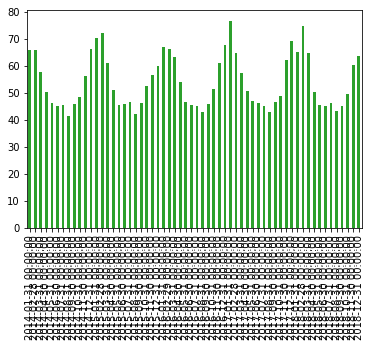

In [29]:
lws1M.load.plot.bar(color='C2');

### Compute average for each month

In [33]:
lws1M.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
             4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64')

In [35]:
lws1Mm = lws1M.groupby(lws1M.index.month).mean()
lws1Mm.index.name = 'month'
lws1Mm

,load,wind_cf,solar_cf
month,,,
1,69.014058,0.333760,0.058469
2,68.754559,0.351343,0.092110
3,60.834729,0.279881,0.137145
4,51.171752,0.195849,0.182340
5,46.067583,0.192881,0.194589
6,45.439776,0.152508,0.214124
7,45.650121,0.148653,0.209585
8,42.463402,0.140053,0.197922
9,45.913235,0.158261,0.169910


Correlations, after inter-year averaging are even stronger 

In [150]:
lws1Mm.corr()

,load,wind_cf,solar_cf
load,1.000000,0.987279,-0.899014
wind_cf,0.987279,1.000000,-0.877551
solar_cf,-0.899014,-0.877551,1.000000


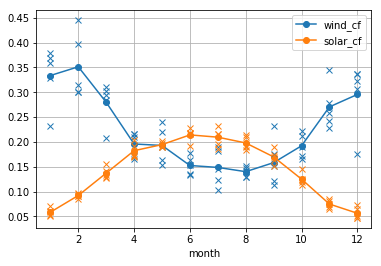

In [108]:
lws1Mm[['wind_cf', 'solar_cf']].plot(marker='o')
plt.plot(lws1M.index.month, lws1M.wind_cf, 'x', color='C0')
plt.plot(lws1M.index.month, lws1M.solar_cf, 'x', color='C1')
plt.grid(True)
plt.xlim(0.5, 12.5);

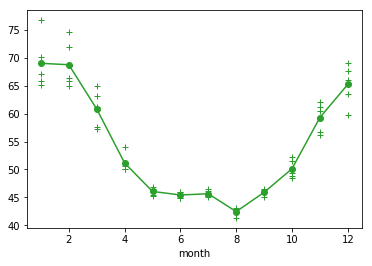

In [48]:
lws1Mm.load.plot(marker='o', color='C2')
plt.plot(lws1M.index.month, lws1M.load, '+', color='C2')
plt.xlim(0.5, 12.5);

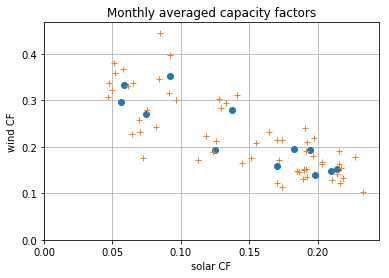

In [50]:
plt.plot(lws1Mm.solar_cf, lws1Mm.wind_cf, 'o')
plt.plot(lws1M.solar_cf, lws1M.wind_cf, '+')
ax = plt.gca()
ax.grid(True)
ax.set(
    title='Monthly averaged capacity factors',
    xlim=(0, lws1M.solar_cf.max()*1.05),
    xlabel='solar CF',
    ylim=(0, lws1M.wind_cf.max()*1.05),
    ylabel='wind CF'
);

## Geometric view of sizing

sizing vector:
$$x = [P_{wind} P_{sol}]'$$

feasible sizing is a set a linear inequalities
$$Ax \geq b$$
with each line of $A$ containing the capacity factors for wind and solar for a given month, and the correponding element of b being the average load of that month

$$A = \begin{bmatrix} 
cf_{wind}(1) & cf_{sol}(1)\\
\cdots & \cdots\\
cf_{wind}(12) & cf_{sol}(12)
\end{bmatrix} $$

$$b = \big[load(1) \cdots load(12)\big]'$$

In order to plot the lines correponding to $Ax=b$, the easiest way may be to compute their intersections with the axes $P_{wind}=0$ and $P_{sol}=0$.

* for $P_{wind}=0$, $P_{sol} = load/cf_{sol}$. This is the solar power needed to cover this month *alone*.
* for $P_{sol}=0$, $P_{wind} = load/cf_{wind}$. This is the wind power needed to cover this month *alone*.

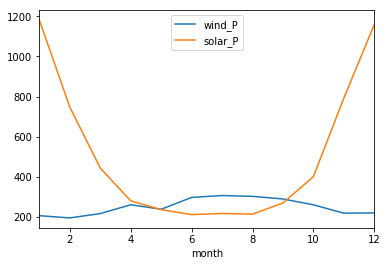

In [56]:
needed_P = pd.DataFrame({
    'wind_P':lws1Mm.load/lws1Mm.wind_cf,
    'solar_P':lws1Mm.load/lws1Mm.solar_cf,
             })
needed_P.plot()

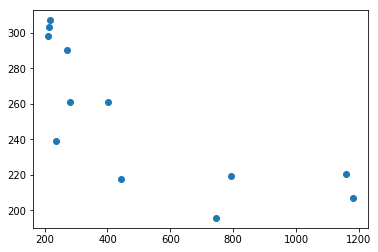

In [99]:
plt.plot(needed_P.solar_P, needed_P.wind_P, 'o')

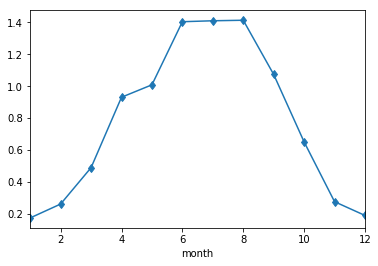

In [155]:
(needed_P.wind_P/needed_P.solar_P).plot(marker='d')

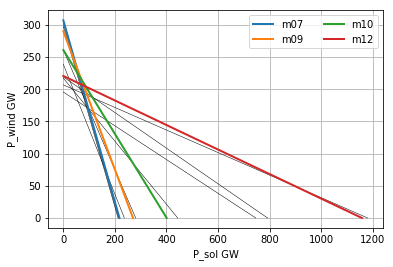

In [156]:
for i in range(1,13):
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], color='k', lw=0.5)
for i in [7, 9, 10, 12]:
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], label=f'm{i:02d}', lw=2)
ax = plt.gca()
plt.legend(ncol=2)
ax.set(
    xlabel='P_sol GW',
    ylabel='P_wind GW'
)
plt.grid()

meaningfull zoom:

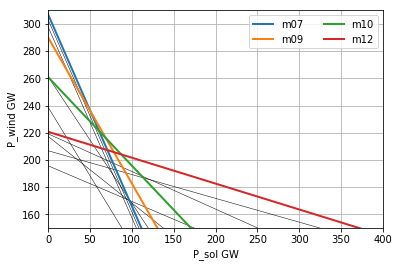

In [152]:
for i in range(1,13):
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], color='k', lw=0.5)
for i in [7, 9, 10, 12]:
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], label=f'm{i:02d}', lw=2)
ax = plt.gca()
plt.legend(ncol=2)
ax.set(
    xlabel='P_sol GW',
    ylabel='P_wind GW'
)
plt.xlim(0, 400)
plt.ylim(150, 310)
plt.grid()

Same plot, but with inter-year averaging:
* 2 months seem very bad

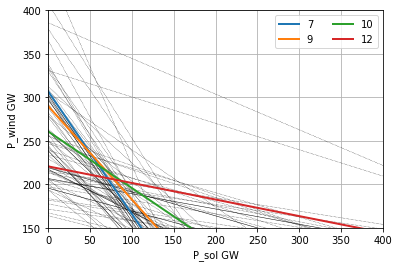

In [97]:
for i in range(len(lws1M)):
    plt.plot([lws1M.load[i]/lws1M.solar_cf[i], 0], [0, lws1M.load[i]/lws1M.wind_cf[i]], ':' ,color='k', lw=0.5)
for i in range(1,13):
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], color='k', lw=0.5)
for i in [7, 9, 10, 12]:
    plt.plot([needed_P.solar_P[i], 0], [0, needed_P.wind_P[i]], label=i, lw=2)
ax = plt.gca()
plt.legend(ncol=2)
ax.set(
    xlabel='P_sol GW',
    ylabel='P_wind GW'
)
plt.xlim(0, 400)
plt.ylim(150, 400)
plt.grid()

Obs: two very bad months. (2016-12 and 2017-01, cf. time plot below)

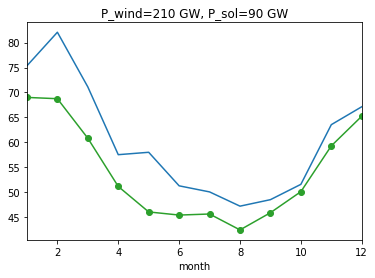

In [186]:
def plot_year(P_wind=210, P_sol=90):
    lws1Mm.load.plot(marker='o', color='C2')
    P_ws = lws1Mm.wind_cf*P_wind + lws1Mm.solar_cf*P_sol
    plt.plot(lws1Mm.index, P_ws)
    
    if (lws1Mm.load>P_ws).any():
        lws1Mm.load[lws1Mm.load>P_ws].plot(marker='d', linestyle='', color='C3')
    
    plt.title(f'P_wind={P_wind} GW, P_sol={P_sol} GW')

plot_year(P_wind=210, P_sol=90)

In [180]:
from ipywidgets import interact

In [184]:
interact(plot_year, P_wind=(100, 300, 10), P_sol=(0, 200, 10))

interactive(children=(IntSlider(value=210, description='P_wind', max=300, min=100, step=10), IntSlider(value=9…

<function __main__.plot_year(P_wind=210, P_sol=90)>

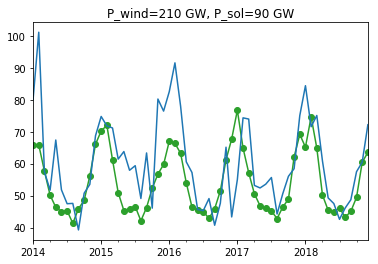

In [185]:
def plot_multi_year(P_wind=210, P_sol=90):
    lws1M.load.plot(marker='o', color='C2')
    P_ws = lws1M.wind_cf*P_wind + lws1M.solar_cf*P_sol
    P_ws.plot()
    plt.title(f'P_wind={P_wind} GW, P_sol={P_sol} GW')
plot_multi_year(P_wind=210, P_sol=90)

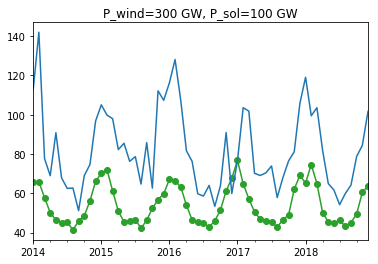

In [106]:
plot_multi_year(P_wind=300, P_sol=100)

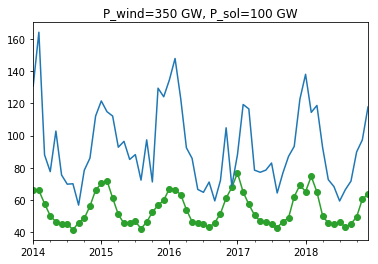

In [105]:
plot_multi_year(P_wind=350, P_sol=100)

## Daily capacity factors in winter

question is: when there is a low wind day in winter, is it true that there is strong solar production that can compensate for it?

In [120]:
lws1D = lws.resample('1D').mean()
winter = (lws1D.index.month==1) | (lws1D.index.month==12)
lws1D_winter = lws1D[winter]

The correlation between wind and solar cf during Dec and Jan is **slightly negative**: -0.26

In [125]:
lws1D_winter.corr()

,load,wind_cf,solar_cf
load,1.000000,-0.322519,0.228592
wind_cf,-0.322519,1.000000,-0.259562
solar_cf,0.228592,-0.259562,1.000000


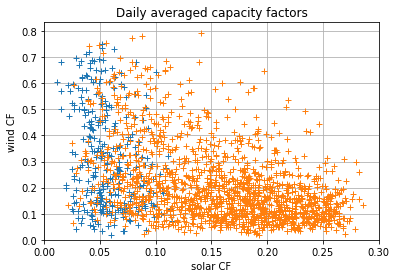

In [188]:
plt.plot(lws1D_winter.solar_cf, lws1D_winter.wind_cf, '+')
plt.plot(lws1D[~winter].solar_cf, lws1D[~winter].wind_cf, '+')

ax = plt.gca()
ax.grid(True)
ax.set(
    title='Daily averaged capacity factors',
    xlim=(0, lws1D.solar_cf.max()*1.05),
    xlabel='solar CF',
    ylim=(0, lws1D.wind_cf.max()*1.05),
    ylabel='wind CF'
);

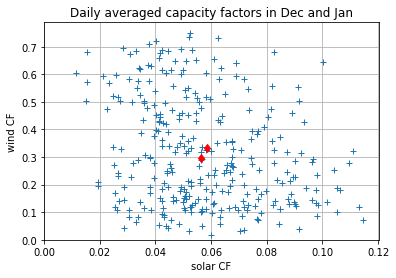

In [189]:
plt.plot(lws1D_winter.solar_cf, lws1D_winter.wind_cf, '+')
plt.plot(lws1Mm.solar_cf[1], lws1Mm.wind_cf[1], 'rd')
plt.plot(lws1Mm.solar_cf[12], lws1Mm.wind_cf[12], 'rd')

ax = plt.gca()
ax.grid(True)
ax.set(
    title='Daily averaged capacity factors in Dec and Jan',
    xlim=(0, lws1D_winter.solar_cf.max()*1.05),
    xlabel='solar CF',
    ylim=(0, lws1D_winter.wind_cf.max()*1.05),
    ylabel='wind CF'
);

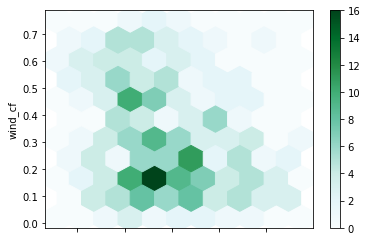

In [148]:
lws1D_winter.plot.hexbin(x='solar_cf',y='wind_cf', gridsize=10)

In [126]:
from pandas.plotting import scatter_matrix

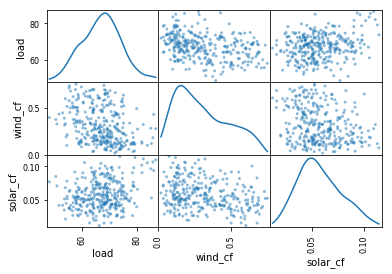

In [187]:
scatter_matrix(lws1D_winter, diagonal='kde');

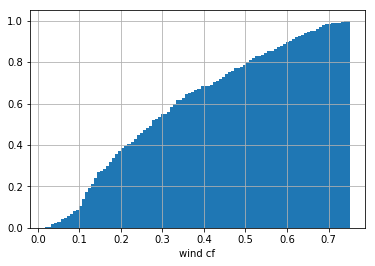

In [217]:
lws1D_winter.wind_cf.hist(cumulative=True, density=True, bins=100)
plt.xlabel('wind cf');

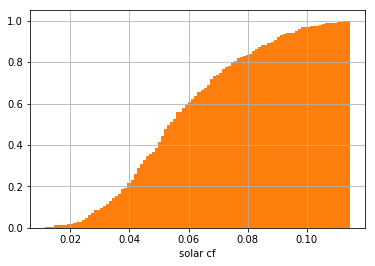

In [219]:
lws1D_winter.solar_cf.hist(cumulative=True, density=True, bins=100, color='C1')
plt.xlabel('solar cf');

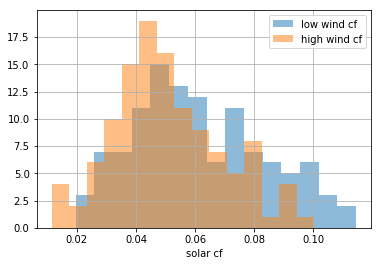

In [216]:
lws1D_winter[lws1D_winter.wind_cf<0.2].solar_cf.hist(alpha=0.5, label='low wind cf', bins=15)
lws1D_winter[lws1D_winter.wind_cf>0.35].solar_cf.hist(alpha=0.5, label='high wind cf', bins=15)
ax = plt.gca()
ax.set(
    xlabel='solar cf',
)
plt.legend();

Conclusion: there is *some compensation* of low wind period, but not so much.

Contingency table:

In [235]:
low_high.categories

Index(['low', 'high'], dtype='object')

In [245]:
low_high = pd.CategoricalDtype(['low', 'high'], ordered=True)
wind_cat = pd.Series(index=lws1D_winter.index, dtype=low_high, name='wind_cf')
wind_cat[lws1D_winter.wind_cf<0.2] = 'low'
wind_cat[lws1D_winter.wind_cf>=0.2] = 'high'

solar_cat = pd.Series(index=lws1D_winter.index, dtype=low_high, name='solar_cf')
solar_cat[lws1D_winter.solar_cf<0.05] = 'low'
solar_cat[lws1D_winter.solar_cf>=0.05] = 'high'

In [246]:
a = pd.crosstab(wind_cat, solar_cat,
            margins=True,
            normalize=True)
a.round(2)

solar_cf,low,high,All
wind_cf,,,
low,0.12,0.25,0.63
high,0.28,0.35,0.37
All,0.40,0.60,1.00


In [247]:
0.40*0.63

0.252

observation:
* under independance, probability of low wind and sun should be 25%
* actual proba is only 12%